In [199]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [200]:
df = pd.read_csv('used_cars.csv')

df.head()

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5


In [201]:
brand_encoder = LabelEncoder()
model_encoder = LabelEncoder()
engine_type_encoder = LabelEncoder()
df['brand_tokenized'] = brand_encoder.fit_transform(df['brand'])
df['model_tokenized'] = model_encoder.fit_transform(df['model'])
df['engine_type_tokenized'] = engine_type_encoder.fit_transform(df['engine_type'])

df.head()

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records,brand_tokenized,model_tokenized,engine_type_tokenized
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4,0,14,1
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,gas,6.0,39.0,42.2,37.0,35.7,16,3,3,0
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,gas,6.0,38.3,43.7,38.0,33.2,13,1,4,0
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,gas,6.0,37.5,42.3,36.8,37.4,26,2,1,0
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,gas,6.0,39.0,42.2,37.0,35.7,5,3,3,0


In [202]:
class MyModel(nn.Module):
    def __init__(self, num_inputs):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(num_inputs, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.out = nn.Linear(16,1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = self.out(x)
        return x
    
model = MyModel(5)

In [203]:
target = torch.tensor(df['price'].values, dtype=torch.float32)
inputs = torch.tensor(df[['year', 'miles', 'brand_tokenized', 'model_tokenized', 'engine_type_tokenized']].values, dtype=torch.float32)

In [204]:
optimizer = optim.Adam(model.parameters(), lr=0.1 )
loss_fn = nn.MSELoss()

In [205]:
losses = []

In [206]:
def train(epochs: int):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch %1000 == 0:
            print(f'Epoch {epoch} / {epochs}, Loss: {loss.item()}')

In [207]:
train(100000)

c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 / 100000, Loss: 478200288.0
Epoch 1000 / 100000, Loss: 13775955.0
Epoch 2000 / 100000, Loss: 12419457.0
Epoch 3000 / 100000, Loss: 12386699.0
Epoch 4000 / 100000, Loss: 12309590.0
Epoch 5000 / 100000, Loss: 5848985088.0
Epoch 6000 / 100000, Loss: 13165992.0
Epoch 7000 / 100000, Loss: 12305395.0
Epoch 8000 / 100000, Loss: 12430631.0
Epoch 9000 / 100000, Loss: 35905316.0
Epoch 10000 / 100000, Loss: 13446206.0
Epoch 11000 / 100000, Loss: 13019144.0
Epoch 12000 / 100000, Loss: 12268839.0
Epoch 13000 / 100000, Loss: 12241302.0
Epoch 14000 / 100000, Loss: 12239538.0
Epoch 15000 / 100000, Loss: 12805894.0
Epoch 16000 / 100000, Loss: 12240152.0
Epoch 17000 / 100000, Loss: 12238497.0
Epoch 18000 / 100000, Loss: 12238477.0
Epoch 19000 / 100000, Loss: 12238465.0
Epoch 20000 / 100000, Loss: 12238457.0
Epoch 21000 / 100000, Loss: 12442939.0
Epoch 22000 / 100000, Loss: 189189568.0
Epoch 23000 / 100000, Loss: 12261247.0
Epoch 24000 / 100000, Loss: 186901504.0
Epoch 25000 / 100000, Loss: 12249

Text(0, 0.5, 'Loss')

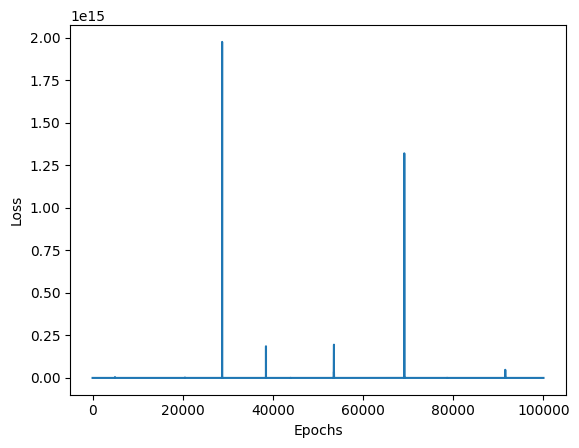

In [208]:
plt.plot(range(len(losses)), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [209]:
def predict_compare_dl(brand, car_model, year, miles, engine_type, price):
    brand = brand_encoder.transform([brand])[0]
    car_model = model_encoder.transform([car_model])[0]
    engine_type = engine_type_encoder.transform([engine_type])[0]
    input = torch.tensor([year, miles, brand, car_model, engine_type], dtype=torch.float32)
    print(f'Predicted price: ${model(input).item():.2f}\tActual price: ${price:.2f}')
    print(f'Error: ${abs(model(input).item() - price)}')
    return model(input).item()


In [210]:
df.sample(5)

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records,brand_tokenized,model_tokenized,engine_type_tokenized
5,11,Honda,Civic,2016,61459,31,41,158,138,2.0,...,gas,6.0,37.5,42.3,36.8,37.4,13,2,1,0
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4,0,14,1
36,42,Chevrolet,Malibu,2018,13726,22,32,250,260,2.0,...,gas,9.0,39.1,42.0,37.5,38.1,7,0,10,0
21,27,Ford,Fusion,2020,35743,20,29,245,275,2.0,...,gas,6.0,39.2,44.3,37.8,38.3,8,1,5,0
6,12,Subaru,Legacy,2022,6811,27,35,182,176,2.5,...,gas,6.0,39.4,42.8,37.2,39.5,6,4,9,0


In [211]:
predict_compare_dl('Honda', 'Civic', 2018, 75311, 'gas', 18995)

Predicted price: $21808.09	Actual price: $18995.00
Error: $2813.0859375


21808.0859375

</h>Now, compare to a sklearn decision tree<h>

In [212]:
feature_names = ['year', 'miles', 'brand_tokenized', 'model_tokenized', 'engine_type_tokenized']
tree = DecisionTreeRegressor()
tree.fit(df[feature_names], df['price'])

DecisionTreeRegressor()

In [213]:
def predict_compare_tree(brand, car_model, year, miles, engine_type, price):
    brand = brand_encoder.transform([brand])[0]
    car_model = model_encoder.transform([car_model])[0]
    engine_type = engine_type_encoder.transform([engine_type])[0]
    input = [[year, miles, brand, car_model, engine_type]]
    print(f'Predicted price: ${tree.predict(input)[0]:.2f}\tActual price: ${price:.2f}')
    print(f'Error: ${abs(tree.predict(input)[0] - price)}')
    return tree.predict(input)[0]

In [214]:
predict_compare_tree('Honda', 'Civic', 2018, 75311, 'gas', 18995)

Predicted price: $17488.00	Actual price: $18995.00
Error: $1507.0


c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


17488.0

In [215]:
def compare_models(brand, car_model, year, miles, engine_type, price):
    print('Deep Learning Model:')
    predict_compare_dl(brand, car_model, year, miles, engine_type, price)
    print('\nDecision Tree Model:')
    predict_compare_tree(brand, car_model, year, miles, engine_type, price)

In [216]:
compare_models('Honda', 'Civic', 2015, 37334, 'gas', 15995)

Deep Learning Model:
Predicted price: $21748.02	Actual price: $15995.00
Error: $5753.0234375

Decision Tree Model:
Predicted price: $22899.00	Actual price: $15995.00
Error: $6904.0


c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [217]:
compare_models('Ford', 'Fusion', 2019, 63569, 'gas', 15758)

Deep Learning Model:
Predicted price: $21813.34	Actual price: $15758.00
Error: $6055.3359375

Decision Tree Model:
Predicted price: $15590.00	Actual price: $15758.00
Error: $168.0


c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [218]:
compare_models('Volkswagen', 'Passat', 2012, 90677, 'gas', 7999)

Deep Learning Model:
Predicted price: $21699.59	Actual price: $7999.00
Error: $13700.5859375

Decision Tree Model:
Predicted price: $13590.00	Actual price: $7999.00
Error: $5591.0


c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [219]:
compare_models('Subaru', 'Impreza', 2017, 45671, 'gas', 10995)

Deep Learning Model:
Predicted price: $21742.09	Actual price: $10995.00
Error: $10747.0859375

Decision Tree Model:
Predicted price: $22388.00	Actual price: $10995.00
Error: $11393.0


c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [222]:
compare_models('Hyundai', 'Sonata', 2020, 40453, 'gas', 18000)

Deep Learning Model:
Predicted price: $21769.34	Actual price: $18000.00
Error: $3769.3359375

Decision Tree Model:
Predicted price: $22493.00	Actual price: $18000.00
Error: $4493.0


c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [226]:
compare_models('Chevrolet', 'Malibu', 2019, 57612, 'gas', 15887)

Deep Learning Model:
Predicted price: $21809.96	Actual price: $15887.00
Error: $5922.9609375

Decision Tree Model:
Predicted price: $19795.00	Actual price: $15887.00
Error: $3908.0


c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [227]:
compare_models('Chevrolet', 'Malibu', 2010, 186276, 'gas', 3995)

Deep Learning Model:
Predicted price: $36481.84	Actual price: $3995.00
Error: $32486.8359375

Decision Tree Model:
Predicted price: $13590.00	Actual price: $3995.00
Error: $9595.0


c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\cap10\Desktop\programming\PyTorchModels\CarPredictor\car_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
prices = []
for i in range(0,100000):
    prices.append(model(torch.tensor([2015, 37334, 13, 10, 0], dtype=torch.float32)).item())